## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [4]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(x)
            x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [5,10,25]

In [14]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
EARLYSTOP = dict()
for P in PATIENCE:
    EARLYSTOP['monitor_val_loss;patience=%s' % (str(P))] = keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                                         patience=P,verbose=1),
    EARLYSTOP['monitor_val_accuracy;patience=%s' % (str(P))] = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                                                             patience=P,verbose=1)

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for E in EARLYSTOP.keys():
    keras.backend.clear_session()
    exp_name_tag = str(E)
    print('-------------------------------'+exp_name_tag+'-------------------------------')
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test, y_test),
              shuffle=True,callbacks=[EARLYSTOP[E]])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

-------------------------------monitor_val_loss;patience=5-------------------------------
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________

49/49 [==============================] - 4s 78ms/step - loss: 1.8414 - accuracy: 0.3666 - val_loss: 2.1233 - val_accuracy: 0.2173
Epoch 2/50
49/49 [==============================] - 4s 74ms/step - loss: 1.4969 - accuracy: 0.4751 - val_loss: 1.8569 - val_accuracy: 0.3208
Epoch 3/50
49/49 [==============================] - 4s 74ms/step - loss: 1.3784 - accuracy: 0.5166 - val_loss: 1.6838 - val_accuracy: 0.4029
Epoch 4/50
49/49 [==============================] - 4s 74ms/step - loss: 1.3060 - accuracy: 0.5420 - val_loss: 1.5341 - val_accuracy: 0.4628
Epoch 5/50
49/49 [==============================] - 4s 74ms/step - loss: 1.2334 - accuracy: 0.5660 - val_loss: 1.6329 - val_accuracy: 0.4122
Epoch 6/50
49/49 [==============================] - 4s 75ms/step - loss: 1.1709 - accuracy: 0.5912 - val_loss: 1.4864 - val_accuracy: 0.4712
Epoch 7/50
49/49 [==============================] - 4s 75ms/step - loss: 1.1170 - accuracy: 0.6082 - val_loss: 1.5415 - val_accuracy: 0.4514
Epoch 8/50
49/49 [======

Epoch 1/50
49/49 [==============================] - 4s 86ms/step - loss: 1.8629 - accuracy: 0.3598 - val_loss: 2.1248 - val_accuracy: 0.2340
Epoch 2/50
49/49 [==============================] - 4s 76ms/step - loss: 1.5092 - accuracy: 0.4719 - val_loss: 1.8404 - val_accuracy: 0.3305
Epoch 3/50
49/49 [==============================] - 4s 76ms/step - loss: 1.3952 - accuracy: 0.5106 - val_loss: 1.6235 - val_accuracy: 0.4251
Epoch 4/50
49/49 [==============================] - 4s 76ms/step - loss: 1.3127 - accuracy: 0.5401 - val_loss: 1.5119 - val_accuracy: 0.4666
Epoch 5/50
49/49 [==============================] - 4s 79ms/step - loss: 1.2390 - accuracy: 0.5648 - val_loss: 1.5717 - val_accuracy: 0.4419
Epoch 6/50
49/49 [==============================] - 4s 81ms/step - loss: 1.1793 - accuracy: 0.5864 - val_loss: 1.5396 - val_accuracy: 0.4536
Epoch 7/50
49/49 [==============================] - 4s 78ms/step - loss: 1.1202 - accuracy: 0.6095 - val_loss: 1.5494 - val_accuracy: 0.4507
Epoch 8/50
49

Epoch 19/50
49/49 [==============================] - 4s 81ms/step - loss: 0.5350 - accuracy: 0.8201 - val_loss: 1.8385 - val_accuracy: 0.4876
Epoch 20/50
49/49 [==============================] - 4s 79ms/step - loss: 0.4869 - accuracy: 0.8400 - val_loss: 1.9426 - val_accuracy: 0.4697
Epoch 21/50
49/49 [==============================] - 4s 79ms/step - loss: 0.4565 - accuracy: 0.8483 - val_loss: 2.1547 - val_accuracy: 0.4458
Epoch 22/50
49/49 [==============================] - 4s 78ms/step - loss: 0.4170 - accuracy: 0.8623 - val_loss: 2.0930 - val_accuracy: 0.4652
Epoch 23/50
49/49 [==============================] - 4s 79ms/step - loss: 0.3815 - accuracy: 0.8748 - val_loss: 2.1920 - val_accuracy: 0.4543
Epoch 24/50
49/49 [==============================] - 4s 78ms/step - loss: 0.3485 - accuracy: 0.8866 - val_loss: 2.3374 - val_accuracy: 0.4501
Epoch 25/50
49/49 [==============================] - 4s 78ms/step - loss: 0.3220 - accuracy: 0.8969 - val_loss: 2.2701 - val_accuracy: 0.4622
Epoch 

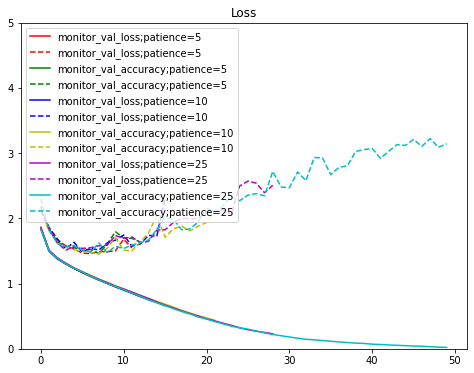

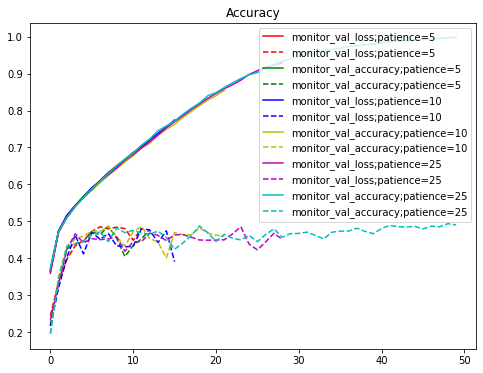

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "c", "silver", "tan", "orange"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()